# DA Final project:

## Group 15

# Electric vehicles in Washington

### Name of students:  
Mor zadik <br>
Hannah Cohen 

<a id='top'></a>

<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%A8%D7%9B%D7%91-%D7%97%D7%A9%D7%9E%D7%9C%D7%99-1.jpg?raw=true" width="800"/>
</div>

## Links:
### Kaggle : https://www.kaggle.com/datasets/jainaru/electric-vehicle-population
### Provenance : https://catalog.data.gov/dataset/electric-vehicle-population-data
### Github : https://github.com/morzadik/morzadik/tree/main


## Import Libraries :

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

## Load Dataset :

In [2]:
df_part1 = pd.read_csv('https://raw.githubusercontent.com/morzadik/morzadik/main/Electric_Vehicle_Part1.csv')
df_part2 = pd.read_csv('https://raw.githubusercontent.com/morzadik/morzadik/main/Electric_Vehicle_Part2.csv')

df_combined = pd.concat([df_part1, df_part2])
ev_data = df_combined 

## Explore The Data :

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
ev_data.shape

(181458, 17)

In [5]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [34]:
ev_data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [7]:
missing_values = ev_data.isna().sum()
zero_values = (ev_data == 0).sum()

missing_and_zero_values = pd.DataFrame({'Missing Values': missing_values,'Zero Values': zero_values})
result = missing_and_zero_values[(missing_and_zero_values['Missing Values'] > 0) | (missing_and_zero_values['Zero Values'] > 0)]
result

,Missing Values,Zero Values
County,3,0
City,3,0
Postal Code,3,0
Electric Range,0,94730
Base MSRP,0,178146
Legislative District,398,0
Vehicle Location,8,0
Electric Utility,3,0
2020 Census Tract,3,0


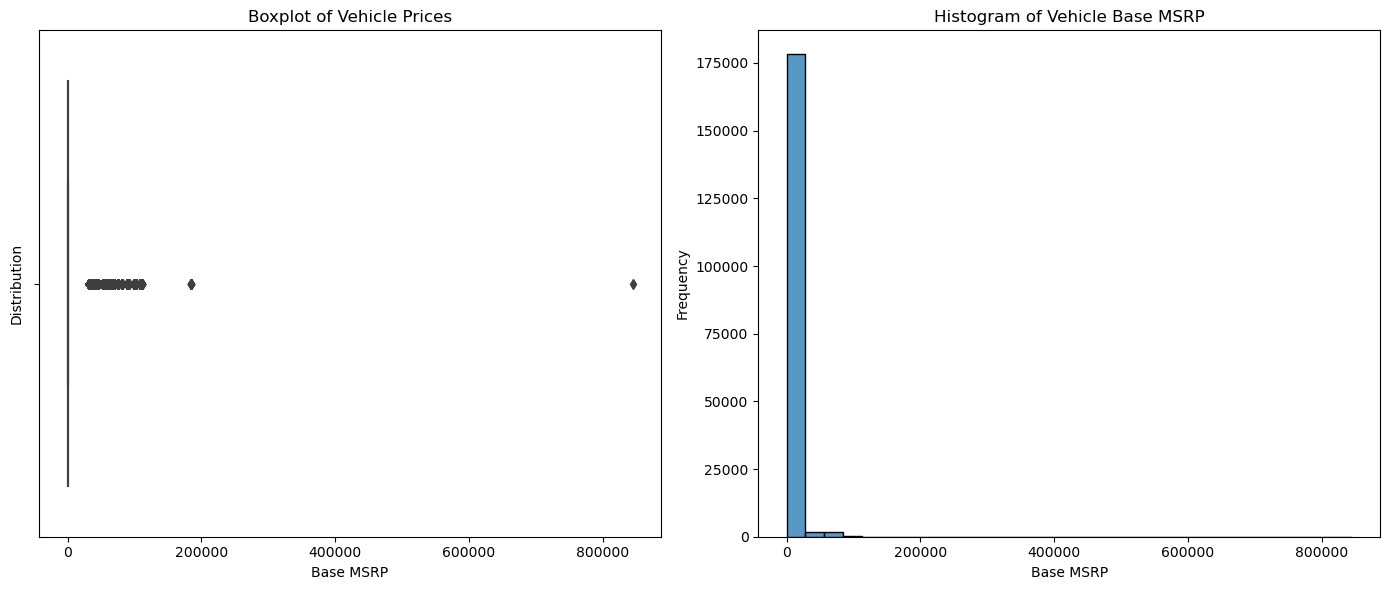

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='Base MSRP', data=ev_data)
axes[0].set_title('Boxplot of Vehicle Prices')
axes[0].set_xlabel('Base MSRP')
axes[0].set_ylabel('Distribution')

sns.histplot(ax=axes[1], x='Base MSRP', data=ev_data, kde=False, bins=30)
axes[1].set_title('Histogram of Vehicle Base MSRP')
axes[1].set_xlabel('Base MSRP')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

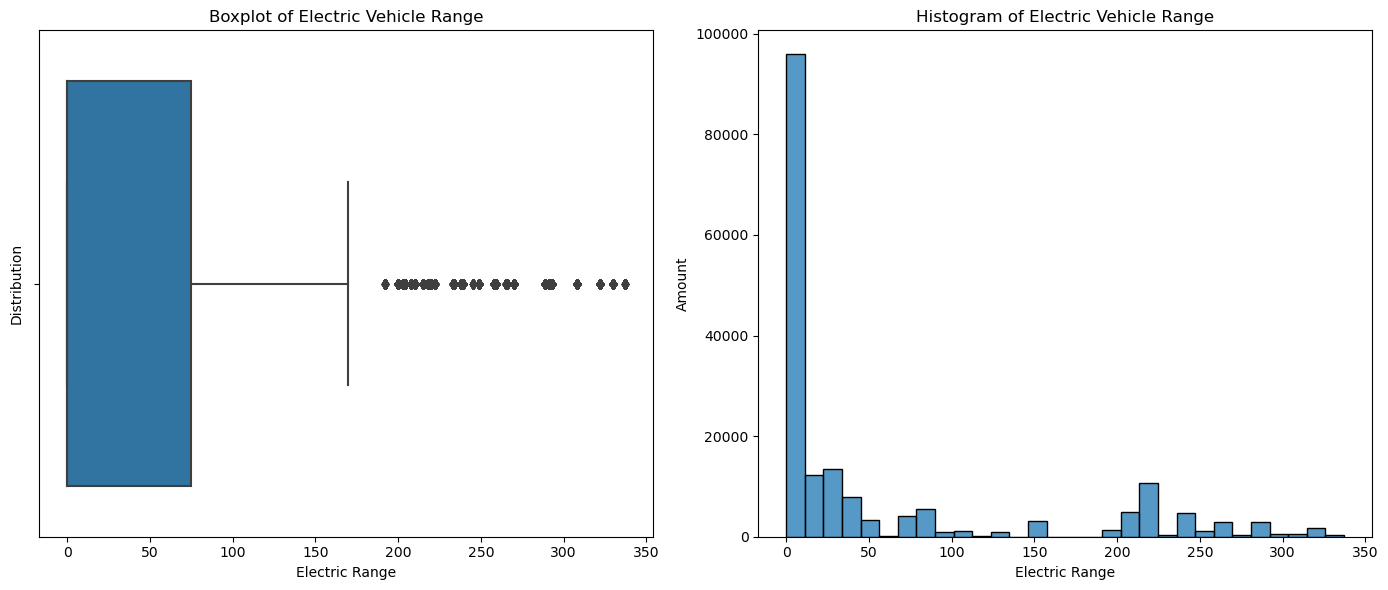

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='Electric Range', data=ev_data)
axes[0].set_title('Boxplot of Electric Vehicle Range')
axes[0].set_xlabel('Electric Range')
axes[0].set_ylabel('Distribution')

sns.histplot(ax=axes[1], x='Electric Range', data=ev_data, kde=False, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Electric Vehicle Range')
axes[1].set_xlabel('Electric Range')
axes[1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

## רקע כללי על הדאטא:

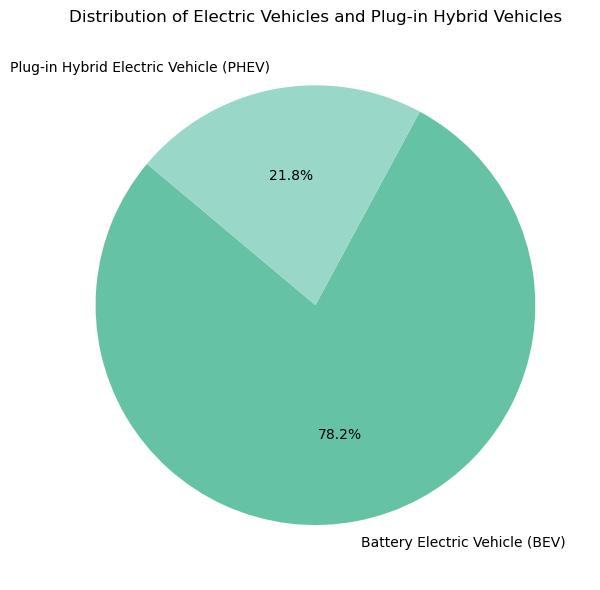

In [10]:
electric_vehicles_all = ev_data['Electric Vehicle Type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#66c2a5', '#99d8c9', '#e5f5f9'] 
ax.pie(electric_vehicles_all, labels=electric_vehicles_all.index, autopct='%1.1f%%', startangle=140, colors=colors)

ax.set_title('Distribution of Electric Vehicles and Plug-in Hybrid Vehicles')

plt.tight_layout()
plt.show()

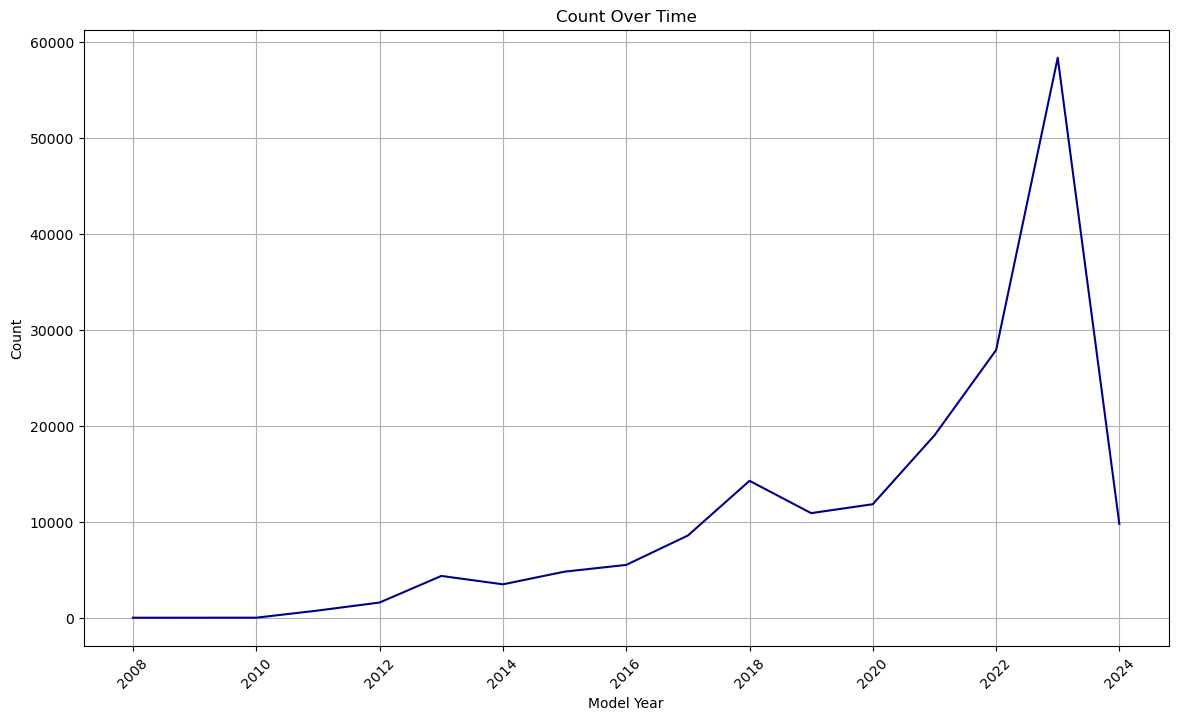

In [11]:
vehicle_sales_distribution_total = ev_data.groupby('Model Year').size().reset_index(name='Count')

vehicle_sales_distribution_filtered = vehicle_sales_distribution_total[vehicle_sales_distribution_total['Model Year'] >= 2008]

def plot_values_by_time(df, column_name):
    df1 = df.copy()
    # Convert the Model Year column to datetime format (assuming the year represents January 1st of that year)
    df1['Model Year'] = pd.to_datetime(df1['Model Year'], format='%Y')
    df1.set_index('Model Year', inplace=True)
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df1, x=df1.index, y=column_name, color='darkblue')
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Model Year')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


plot_values_by_time(vehicle_sales_distribution_filtered, 'Count')

# איזה חברה מובילה בוושינגטון?

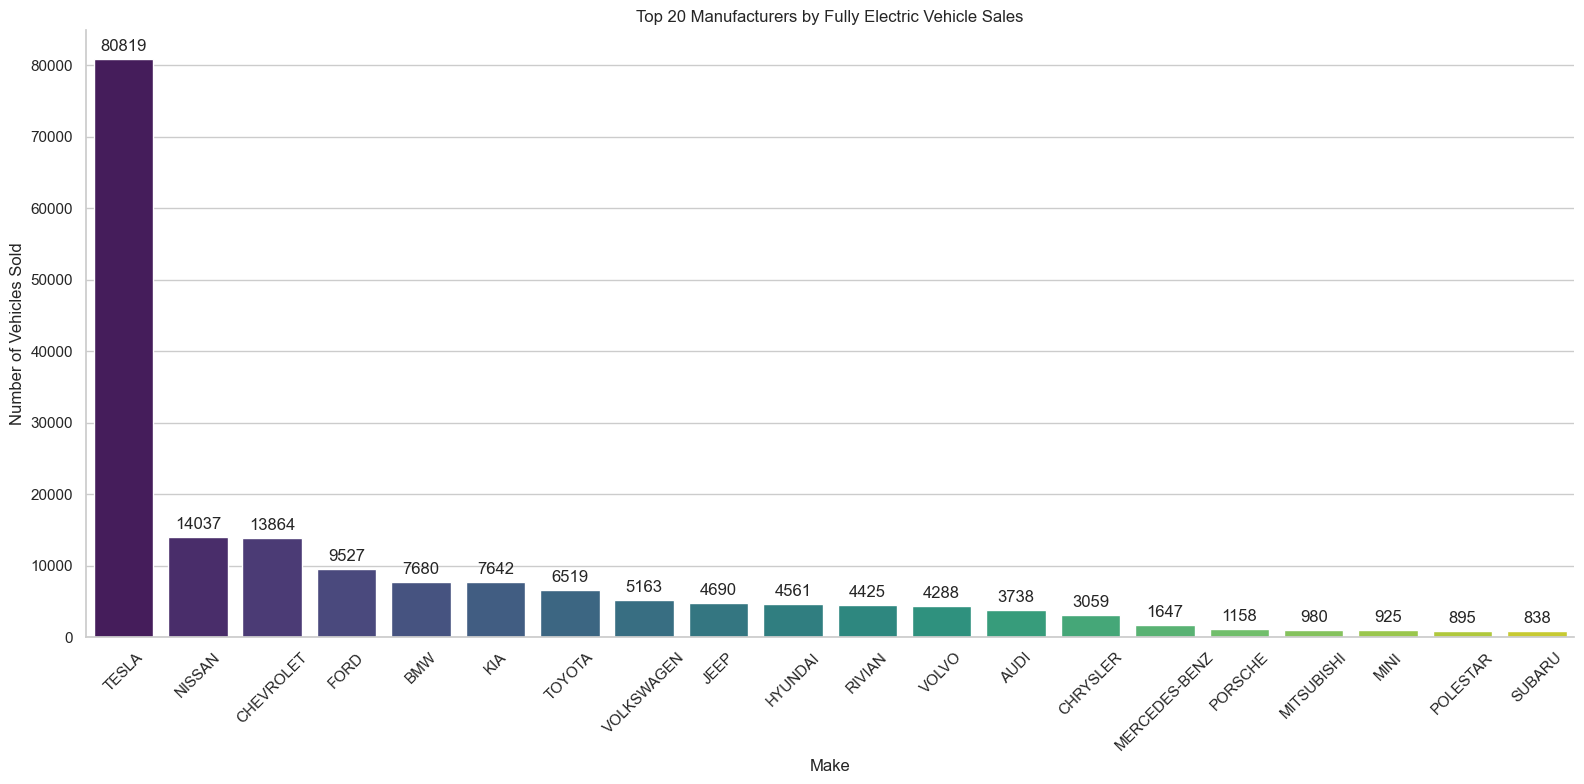

In [12]:
electric_vehicles = ev_data[ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
sales_by_make = ev_data.groupby('Make').size().sort_values(ascending=False).head(20)

data = pd.DataFrame({'Make': sales_by_make.index, 'Number of Vehicles Sold': sales_by_make.values})

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))  
ax = sns.barplot(x='Make', y='Number of Vehicles Sold', data=data, palette='viridis')

ax.set_title('Top 20 Manufacturers by Fully Electric Vehicle Sales')
ax.set_xlabel('Make')
ax.set_ylabel('Number of Vehicles Sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
sns.despine()
plt.tight_layout()

we can see that most of the cars in Washington belong to TESLA

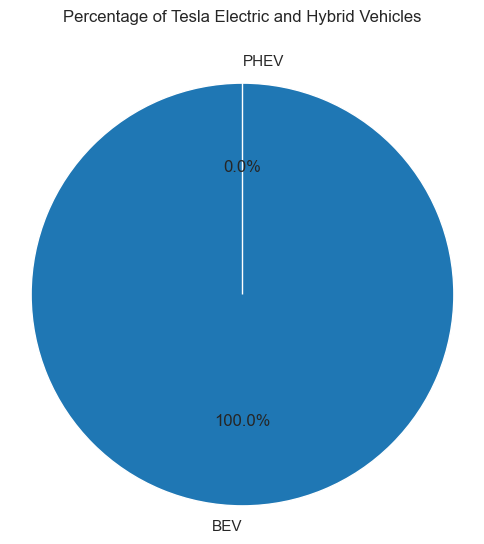

In [13]:
tesla_data = ev_data[ev_data['Make'] == 'TESLA']

tesla_bev_count = tesla_data[tesla_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].shape[0]
tesla_phev_count = tesla_data[tesla_data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]

data = {'Type': ['BEV', 'PHEV'],'Count': [tesla_bev_count, tesla_phev_count]}

df = pd.DataFrame(data)

plt.figure(figsize=(6, 6))  
plt.pie(df['Count'], labels=df['Type'], autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Tesla Electric and Hybrid Vehicles', pad=30)  # Adjust the padding to move the title up
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

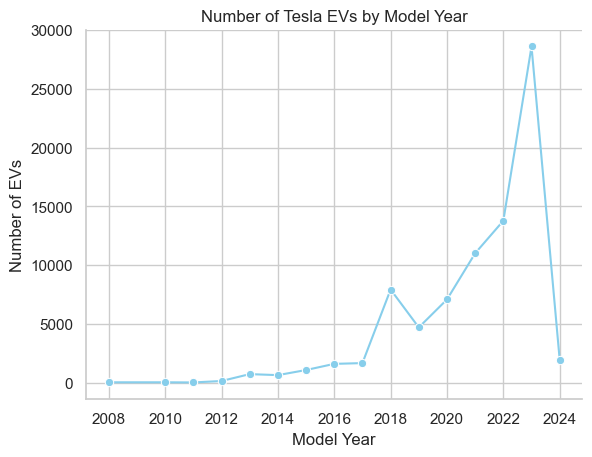

In [14]:
tesla_sales_by_year = tesla_data['Model Year'].value_counts().sort_index()

data = pd.DataFrame({'Model Year': tesla_sales_by_year.index, 'Number of EVs': tesla_sales_by_year.values})

sns.set(style="whitegrid")
ax = sns.lineplot(x='Model Year', y='Number of EVs', data=data, marker='o', color='skyblue')
ax.set_title('Number of Tesla EVs by Model Year')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)

sns.despine()

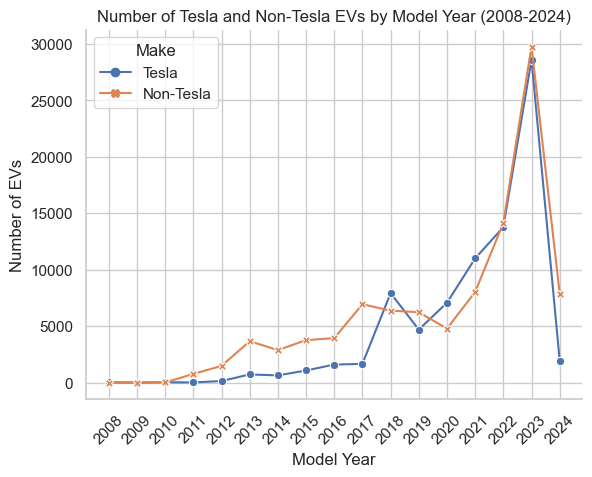

In [15]:
non_tesla_data = ev_data[ev_data['Make'] != 'TESLA']
tesla_sales_by_year = tesla_data['Model Year'].value_counts().sort_index()
non_tesla_sales_by_year = non_tesla_data['Model Year'].value_counts().sort_index()

years = list(range(2008, 2025))

tesla_sales_by_year = tesla_sales_by_year.reindex(years, fill_value=0)
non_tesla_sales_by_year = non_tesla_sales_by_year.reindex(years, fill_value=0)

data = pd.DataFrame({
    'Year': years,
    'Tesla': tesla_sales_by_year.values,
    'Non-Tesla': non_tesla_sales_by_year.values})

data_melted = data.melt('Year', var_name='Make', value_name='Number of EVs')

sns.set(style="whitegrid")
ax = sns.lineplot(x='Year', y='Number of EVs', hue='Make', style='Make', markers=True, dashes=False, data=data_melted)

ax.set_title('Number of Tesla and Non-Tesla EVs by Model Year (2008-2024)')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(title='Make')

sns.despine()

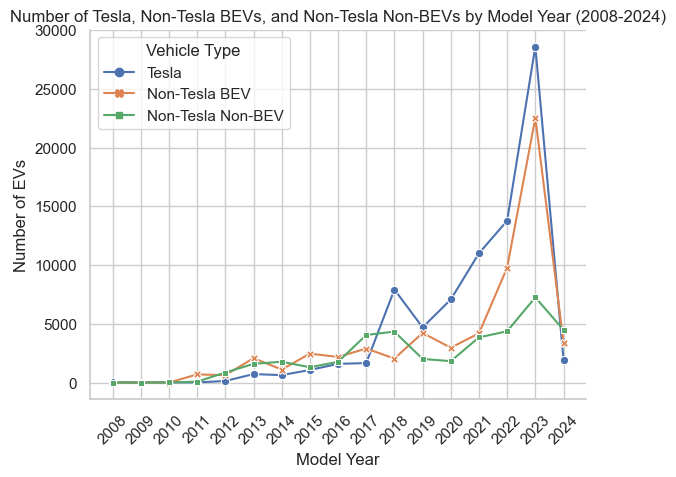

In [16]:
non_tesla_bev_data = ev_data[(ev_data['Make'] != 'TESLA') & (ev_data['Electric Vehicle Type'].str.contains('Battery Electric Vehicle', case=False, na=False))]
non_tesla_non_bev_data = ev_data[(ev_data['Make'] != 'TESLA') & (~ev_data['Electric Vehicle Type'].str.contains('Battery Electric Vehicle', case=False, na=False))]
non_tesla_bev_sales_by_year = non_tesla_bev_data['Model Year'].value_counts().sort_index()
non_tesla_non_bev_sales_by_year = non_tesla_non_bev_data['Model Year'].value_counts().sort_index()

tesla_sales_by_year = tesla_sales_by_year.reindex(years, fill_value=0)
non_tesla_bev_sales_by_year = non_tesla_bev_sales_by_year.reindex(years, fill_value=0)
non_tesla_non_bev_sales_by_year = non_tesla_non_bev_sales_by_year.reindex(years, fill_value=0)

data = pd.DataFrame({
    'Year': years,
    'Tesla': tesla_sales_by_year.values,
    'Non-Tesla BEV': non_tesla_bev_sales_by_year.values,
    'Non-Tesla Non-BEV': non_tesla_non_bev_sales_by_year.values})

data_melted = data.melt('Year', var_name='Vehicle Type', value_name='Number of EVs')

sns.set(style="whitegrid")
ax = sns.lineplot(x='Year', y='Number of EVs', hue='Vehicle Type', style='Vehicle Type', markers=True, dashes=False, data=data_melted)

ax.set_title('Number of Tesla, Non-Tesla BEVs, and Non-Tesla Non-BEVs by Model Year (2008-2024)')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(title='Vehicle Type')

sns.despine()

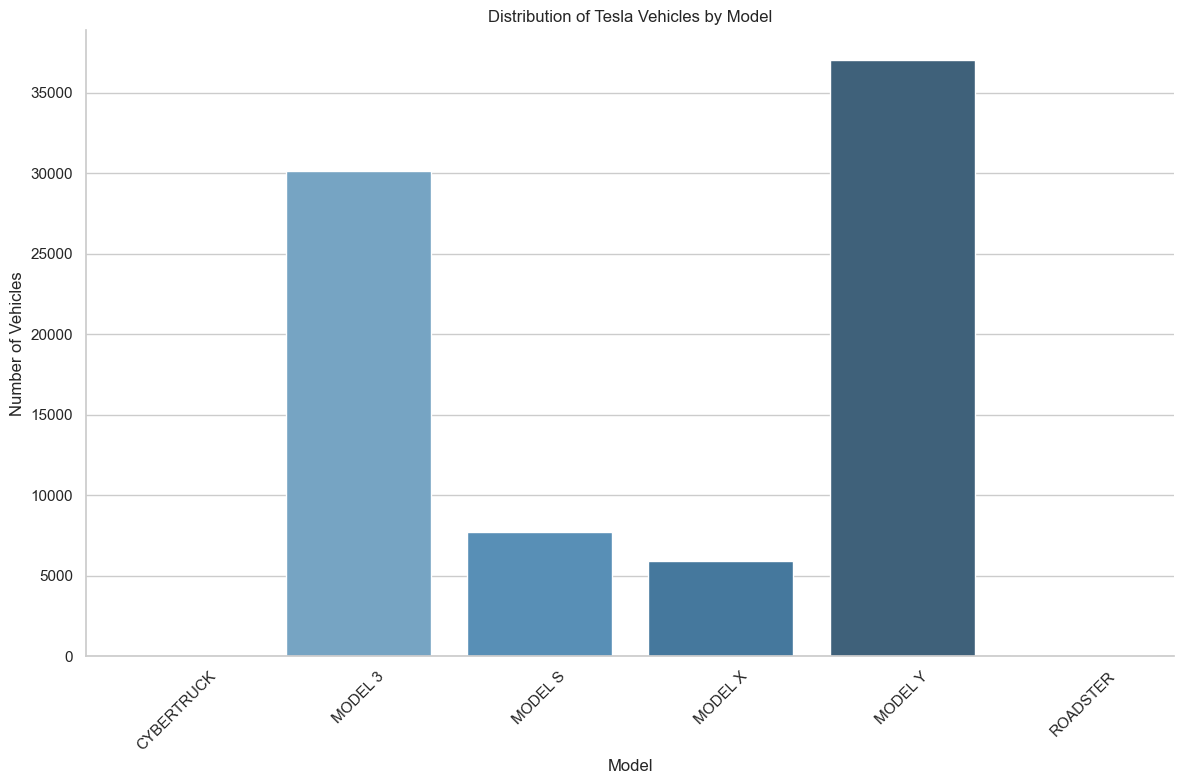

In [17]:
tesla_model_counts = tesla_data['Model'].value_counts().sort_index()

data = pd.DataFrame({'Model': tesla_model_counts.index, 'Number of Vehicles': tesla_model_counts.values})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # התאמת גודל הגרף
ax = sns.barplot(x='Model', y='Number of Vehicles', data=data, palette='Blues_d')

ax.set_title('Distribution of Tesla Vehicles by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Number of Vehicles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

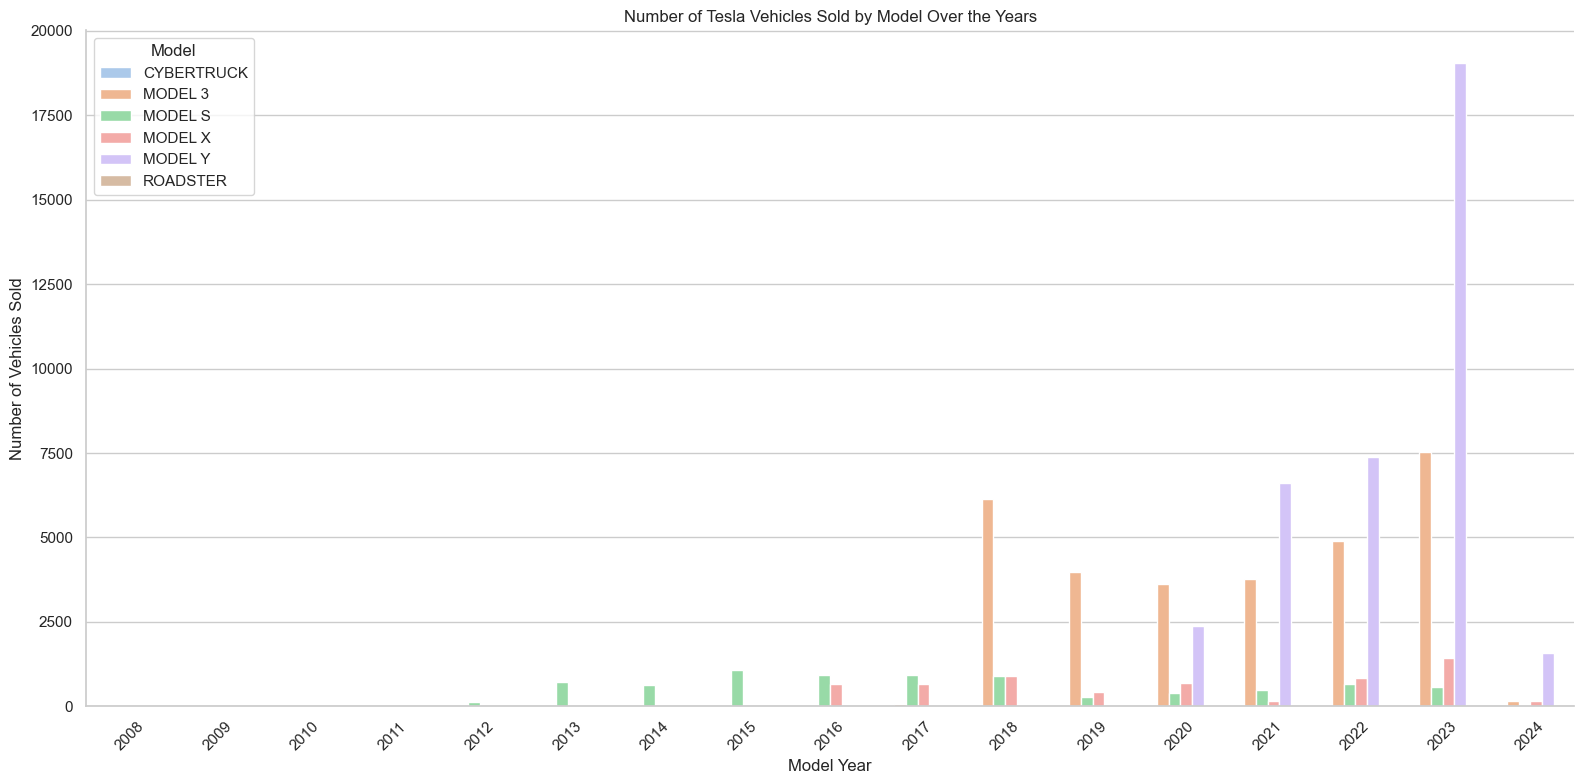

In [18]:
tesla_sales_by_year = tesla_data.groupby(['Model', 'Model Year']).size().unstack(fill_value=0)

all_years = pd.Series(range(2008, 2025))
tesla_sales_by_year = tesla_sales_by_year.reindex(columns=all_years, fill_value=0)

tesla_sales_by_year = tesla_sales_by_year.stack().reset_index(name='Number of Vehicles Sold')
tesla_sales_by_year.columns = ['Model', 'Model Year', 'Number of Vehicles Sold']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(data=tesla_sales_by_year, x='Model Year', y='Number of Vehicles Sold', hue='Model', palette='pastel')

plt.title('Number of Tesla Vehicles Sold by Model Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)
plt.legend(title='Model')

sns.despine()
plt.tight_layout()
plt.show()


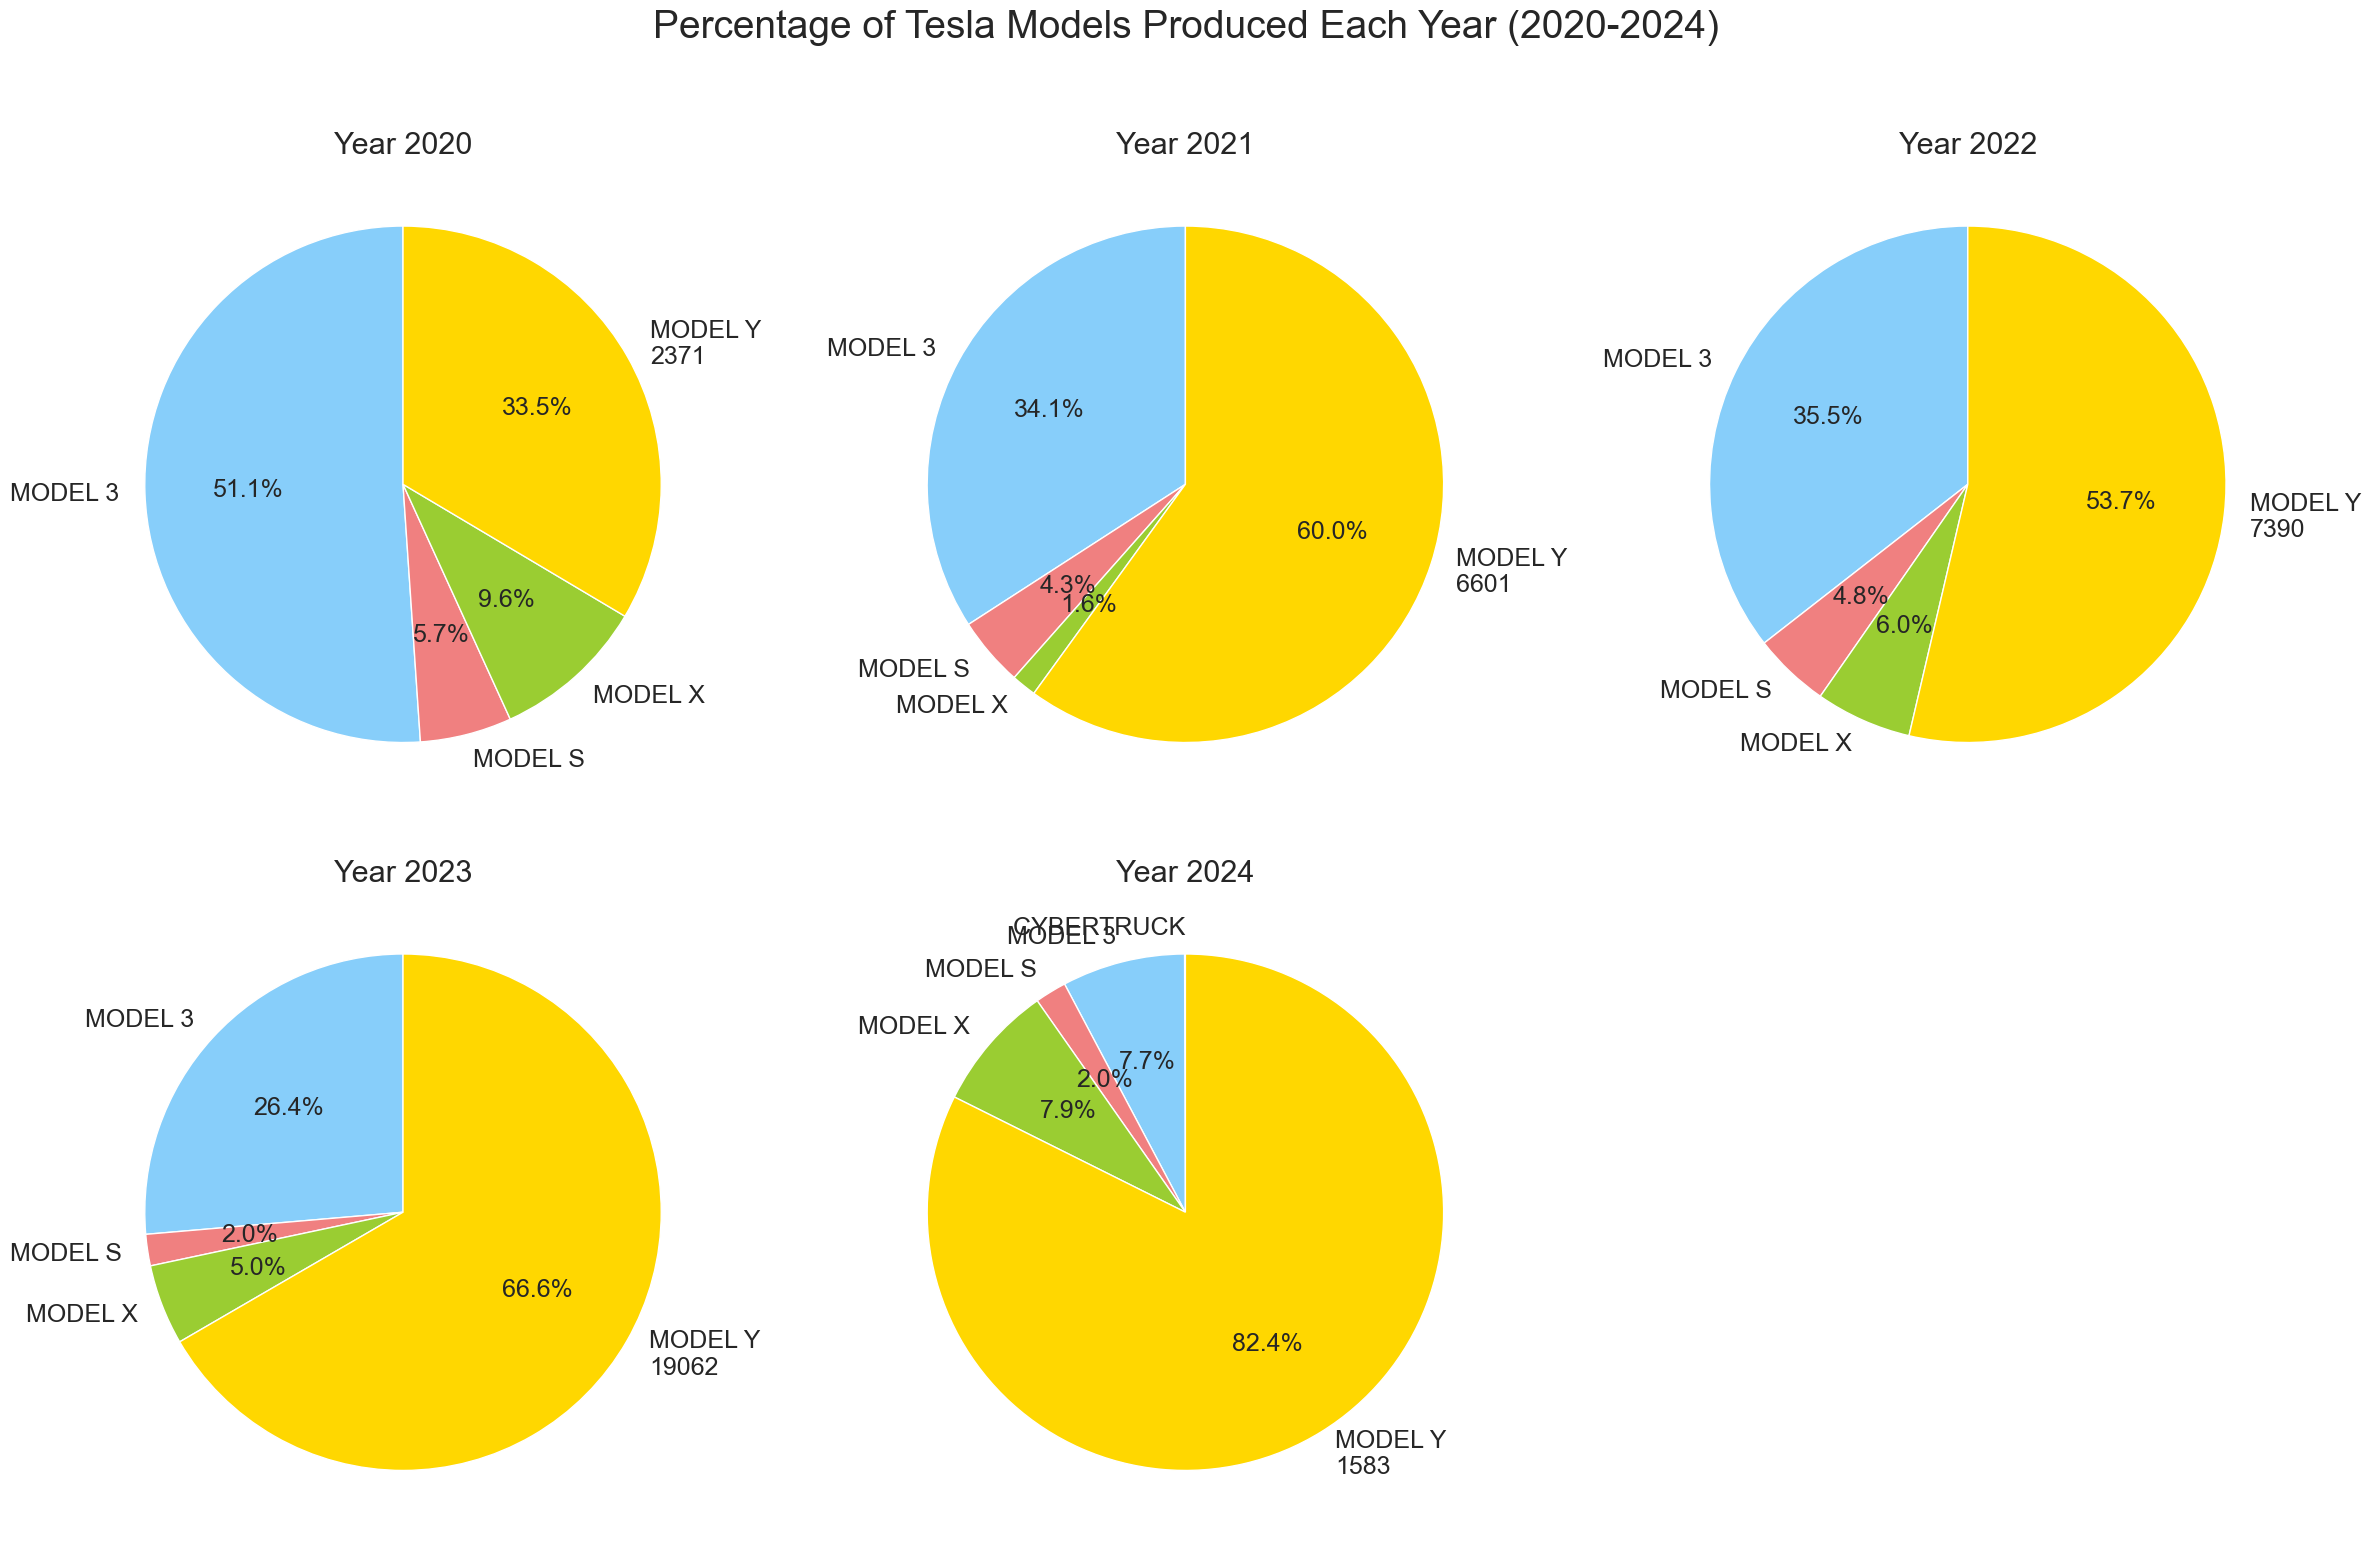

In [19]:
# Filter data for years from 2020 to 2024
tesla_data = tesla_data[(tesla_data['Model Year'] >= 2020) & (tesla_data['Model Year'] <= 2024)]

# Group by Model Year and Model to count the number of vehicles produced each year
tesla_sales_by_year_and_model = tesla_data.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)

# Calculate the percentage of vehicles produced each year for each model
tesla_sales_by_year_and_model_percentage = tesla_sales_by_year_and_model.div(tesla_sales_by_year_and_model.sum(axis=1), axis=0) * 100

# Prepare the data for plotting
tesla_sales_by_year_and_model_percentage = tesla_sales_by_year_and_model_percentage.stack().reset_index(name='Percentage')
tesla_sales_by_year_and_model_percentage.columns = ['Model Year', 'Model', 'Percentage']

# Define a fixed color map for each model
model_colors = {
    'MODEL S': 'lightcoral',
    'MODEL 3': 'lightskyblue',
    'MODEL X': 'yellowgreen',
    'MODEL Y': 'gold',
    'CYBERTRUCK': 'lightpink',
    'ROADSTER': 'lightblue'}

# Plot pie charts for each year showing the percentage produced by each model
years = tesla_sales_by_year_and_model_percentage['Model Year'].unique()
num_years = len(years)
num_cols = 3
num_rows = (num_years // num_cols) + (1 if num_years % num_cols else 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, num_rows * 8))
fig.suptitle('Percentage of Tesla Models Produced Each Year (2020-2024)', fontsize=28)

for i, year in enumerate(years):
    row, col = divmod(i, num_cols)
    ax = axs[row, col] if num_rows > 1 else axs[col]
    data = tesla_sales_by_year_and_model_percentage[tesla_sales_by_year_and_model_percentage['Model Year'] == year]
    data = data[data['Percentage'] > 0]  # Filter out 0.0% values
    colors = [model_colors[model] for model in data['Model']]
    counts = tesla_sales_by_year_and_model.loc[year, data['Model']]
    labels = [f'{model}\n{int(count)}' if model == 'MODEL Y' else model for model, count in zip(data['Model'], counts)]
    if year == 2024:
        labels = [label if model != 'CYBERTRUCK' else ' ' + label for label, model in zip(labels, data['Model'])]  # Move the Cybertruck label
        wedges, texts, autotexts = ax.pie(data['Percentage'], labels=labels, autopct=lambda p: f'{p:.1f}%' if p > 0.1 else '', startangle=90, colors=colors)
    else:
        wedges, texts, autotexts = ax.pie(data['Percentage'], labels=labels, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=90, colors=colors)
    ax.set_title(f'Year {year}', fontsize=22)

    # Increase font size for labels and percentages
    for text in texts:
        text.set_fontsize(18)
    for autotext in autotexts:
        autotext.set_fontsize(18)

# Hide any empty subplots
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    if num_rows > 1:
        fig.delaxes(axs[row, col])
    else:
        fig.delaxes(axs[col])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## : מסקנה ראשונה

### טסלה מובילה את שוק הרכבים החשמליים, במיוחד עם מודל Y.<br> אנו ממליצים לחברות לחקור את היתרונות וההצלחות של מודל זה וליישם את המסקנות במודלים הבאים שלהן.<br> כמו כן, חשוב לעקוב אחר מגמות השוק ולנתח את הנתונים כדי להבין את הביקוש וההעדפות של הלקוחות.

### ניתוח הגרפים מראה בבירור כי אחוז הרכבים החשמליים בוושינגטון גבוה בהרבה מזה של הרכבים ההיברידיים, דבר שמצביע על העדפה מסוימת של הצרכנים. מכאן, שאר החברות בשוק צריכות להשקיע ברכבים חשמליים על מנת להגדיל את המכירות שלהן.

### ההצלחה של טסלה מראה כי השקעה בטכנולוגיה מתקדמת ובחדשנות משתלמת בטווח הארוך. 



<a id='top'></a>
<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%94%D7%95%D7%A8%D7%93%D7%94.jpg?raw=true" width="500"/>
</div>

# באיזה מחוז יש את מספר הרכבים הגבוה ביותר?


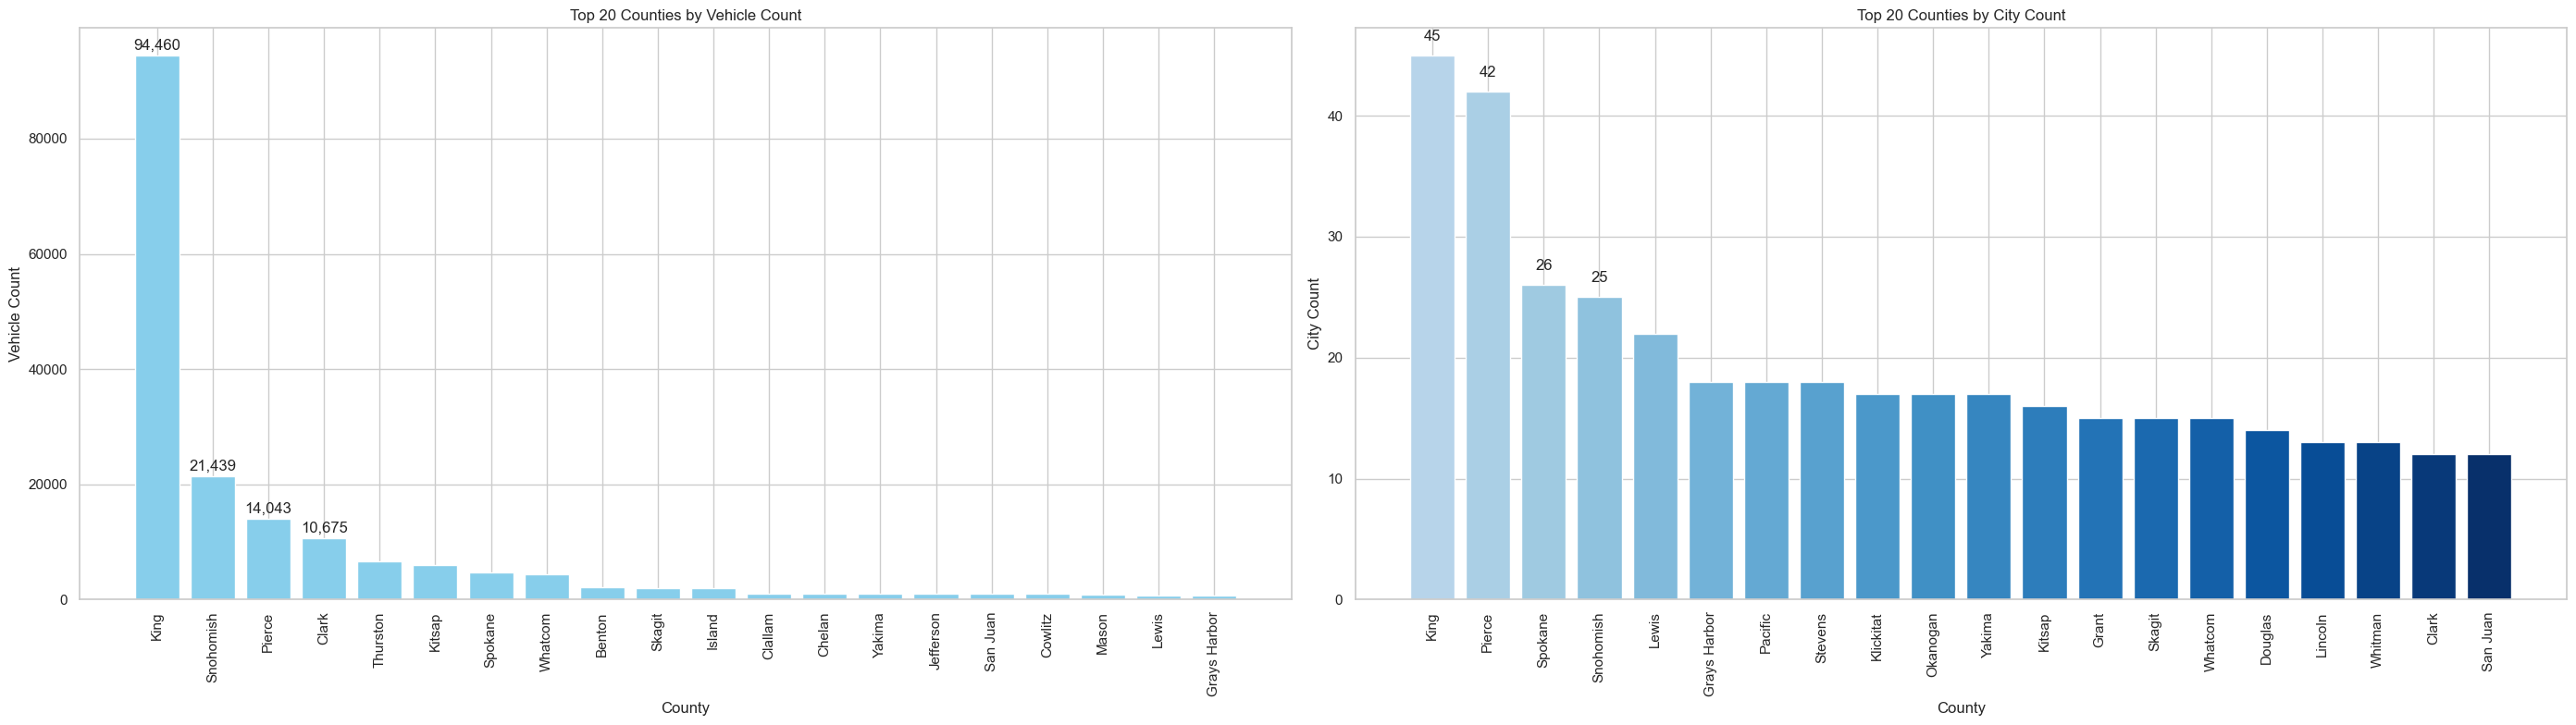

In [20]:
# חישוב מספר הרכבים בכל מחוז
vehicle_count_by_county = ev_data.groupby('County').size().reset_index(name='Vehicle Count')

# מציאת 20 המחוזות עם מספר הרכבים הגבוה ביותר
top_20_counties_by_vehicle_count = vehicle_count_by_county.nlargest(20, 'Vehicle Count')

# חישוב מספר הערים בכל מחוז
city_count_by_county = ev_data.groupby('County')['City'].nunique().reset_index(name='City Count')

# מציאת 20 המחוזות עם מספר הערים הגבוה ביותר
top_20_counties_by_city_count = city_count_by_county.nlargest(20, 'City Count')

# יצירת גרף עמודות להצגת מספר הרכבים ב-20 המחוזות המובילים
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 8))

# גרף 1: מספר הרכבים ב-20 המחוזות המובילים
bars1 = ax1.bar(top_20_counties_by_vehicle_count['County'], top_20_counties_by_vehicle_count['Vehicle Count'], color='skyblue')
ax1.set_ylabel('Vehicle Count')
ax1.set_xlabel('County')
ax1.set_title('Top 20 Counties by Vehicle Count')
ax1.set_xticks(range(len(top_20_counties_by_vehicle_count['County'])))
ax1.set_xticklabels(top_20_counties_by_vehicle_count['County'], rotation=90)

# הוספת המספרים על 4 העמודות הראשונות עם פסיקים
for bar in bars1[:4]:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 500, f"{int(yval):,}", ha='center', va='bottom')

# גרף 2: מספר הערים ב-20 המחוזות המובילים
bars2 = ax2.bar(top_20_counties_by_city_count['County'], top_20_counties_by_city_count['City Count'], color=plt.cm.Blues(np.linspace(0.3, 1, len(top_20_counties_by_city_count))))
ax2.set_ylabel('City Count')
ax2.set_xlabel('County')
ax2.set_title('Top 20 Counties by City Count')
ax2.set_xticks(range(len(top_20_counties_by_city_count['County'])))
ax2.set_xticklabels(top_20_counties_by_city_count['County'], rotation=90)

# הוספת המספרים על 4 העמודות הראשונות עם פסיקים
for bar in bars2[:4]:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{int(yval):,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

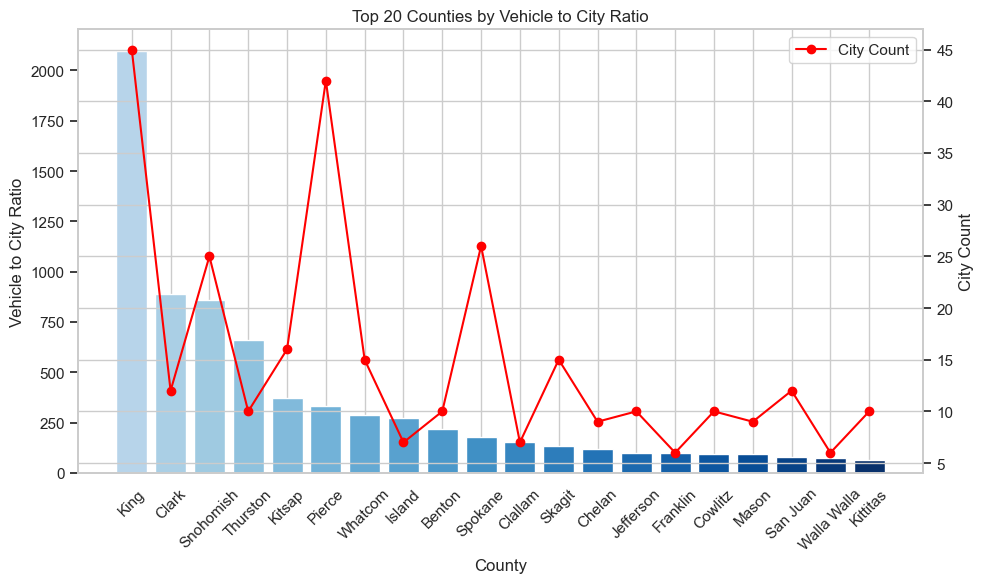

,County,total_count,num_cities,percentage
79,King,94460,45,52.056123
125,Pierce,14043,42,7.738981
163,Spokane,4671,26,2.574149
160,Snohomish,21439,25,11.814855
92,Lewis,767,22,0.422687
61,Grays Harbor,648,18,0.357107
123,Pacific,209,18,0.115178
168,Stevens,223,18,0.122893
189,Yakima,1034,17,0.569829
83,Klickitat,294,17,0.162021


In [21]:
city_count_by_county = ev_data.groupby('County')['City'].nunique().reset_index(name='City Count')

# איחוד הנתונים
merged_data = pd.merge(vehicle_count_by_county, city_count_by_county, on='County')

# חישוב יחס רכבים לערים
merged_data['Vehicle to City Ratio'] = merged_data['Vehicle Count'] / merged_data['City Count']

# מציאת 20 המחוזות עם יחס רכבים לערים הגבוה ביותר
top_20_counties_by_ratio = merged_data.nlargest(20, 'Vehicle to City Ratio')

# יצירת גרף המתאר את המסקנות
fig, ax1 = plt.subplots(figsize=(10, 6))

# גרף עמודות עבור יחס רכבים לערים
ax1.bar(top_20_counties_by_ratio['County'], top_20_counties_by_ratio['Vehicle to City Ratio'], color=plt.cm.Blues(np.linspace(0.3, 1, len(top_20_counties_by_ratio))))
ax1.set_xlabel('County')
ax1.set_ylabel('Vehicle to City Ratio')
ax1.set_title('Top 20 Counties by Vehicle to City Ratio')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# יצירת ציר נוסף למספר הערים בכל מחוז
ax2 = ax1.twinx()
ax2.plot(top_20_counties_by_ratio['County'], top_20_counties_by_ratio['City Count'], color='red', marker='o', linestyle='-', label='City Count')
ax2.set_ylabel('City Count')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()  

# Group by 'County' to get the total count of vehicles and number of unique cities in each county
county_stats = ev_data.groupby('County').agg(total_count=('County', 'size'), num_cities=('City', 'nunique')).reset_index()

# Calculate the percentage of vehicles in each county
total_vehicles = ev_data.shape[0]
county_stats['percentage'] = (county_stats['total_count'] / total_vehicles) * 100

# Sort by the number of unique cities in descending order and get the top 20 counties
top_20_counties = county_stats.sort_values(by='num_cities', ascending=False).head(20)

# Display the top 20 counties with their respective number of cities, total vehicle count, and percentage of total vehicles
top_20_counties

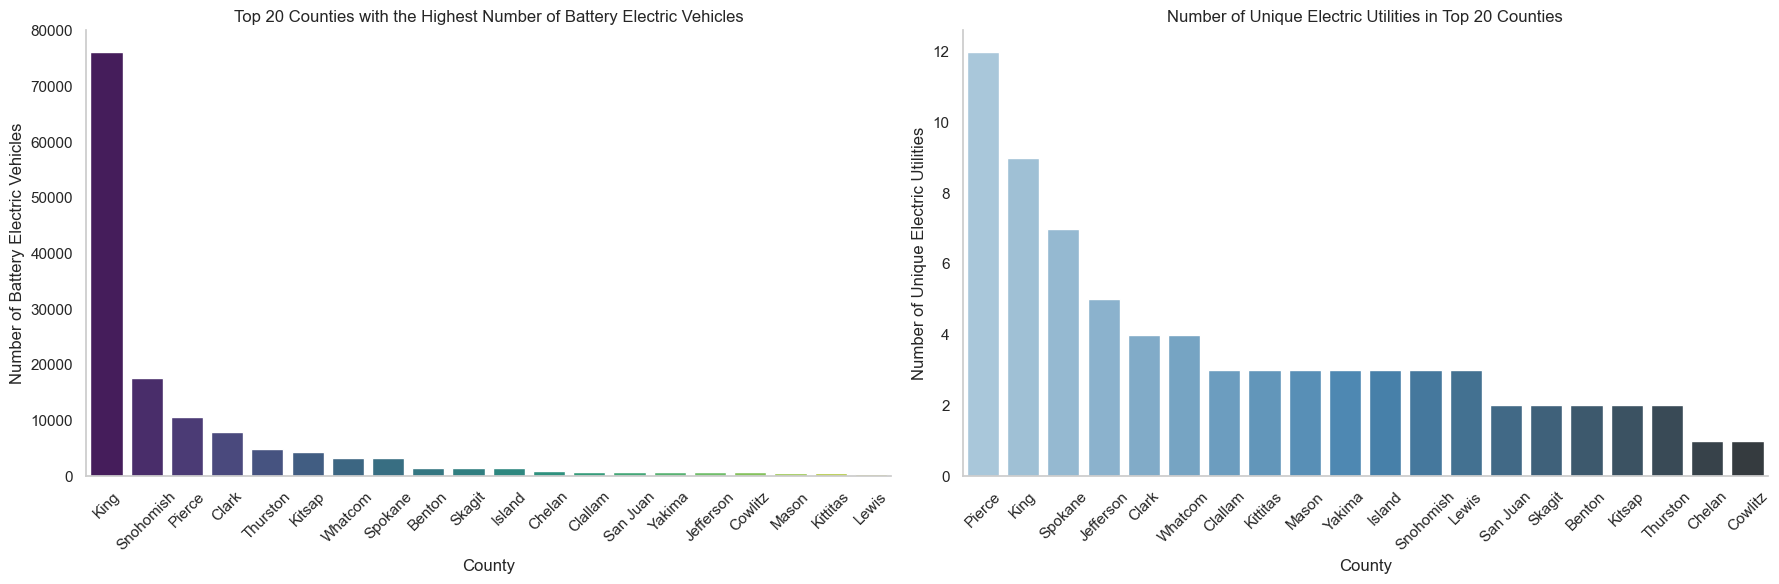

In [22]:
electric_vehicles = ev_data[ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
county_counts = electric_vehicles['County'].value_counts().head(20)

# ספירת מספר הרכבים החשמליים בכל מחוז
county_counts = electric_vehicles['County'].value_counts().reset_index(name='Vehicle Count')
county_counts.columns = ['County', 'Vehicle Count']

top_20_counties = county_counts.head(20)

# ספירת מספר Electric Utility שונים בכל אחד מ-20 המחוזות המובילים
electric_utility_counts = electric_vehicles[electric_vehicles['County'].isin(top_20_counties['County'])].groupby('County')['Electric Utility'].nunique().reset_index(name='Unique Electric Utility Count')

# מיזוג שני מערכי הנתונים
merged_counts = pd.merge(top_20_counties, electric_utility_counts, on='County')

data = {
    'County': merged_counts['County'],
    'Vehicle Count': merged_counts['Vehicle Count'],
    'Unique Electric Utility Count': merged_counts['Unique Electric Utility Count']}

df = pd.DataFrame(data)
df_sorted = df.sort_values('Unique Electric Utility Count', ascending=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# גרף מספר הרכבים בכל מחוז
sns.barplot(x='County', y='Vehicle Count', data=df, ax=ax1, palette='viridis')
ax1.set_title('Top 20 Counties with the Highest Number of Battery Electric Vehicles')
ax1.set_xlabel('County')
ax1.set_ylabel('Number of Battery Electric Vehicles')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(axis='y')
sns.despine()

# גרף מספר ספקי החשמל הייחודיים בכל מחוז בסדר יורד
sns.barplot(x='County', y='Unique Electric Utility Count', data=df_sorted, ax=ax2, palette='Blues_d')
ax2.set_title('Number of Unique Electric Utilities in Top 20 Counties')
ax2.set_xlabel('County')
ax2.set_ylabel('Number of Unique Electric Utilities')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(axis='y')
sns.despine()

plt.tight_layout()
plt.show()

### ניתן לראות כי במחוז פירס יש מספר קטן של רכבים חשמליים, אך מספר גבוה של ספקי חשמל שונים. לעומת זאת, במחוז קינג יש מספר גדול של רכבים חשמליים ומספר קטן יותר של ספקי חשמל.

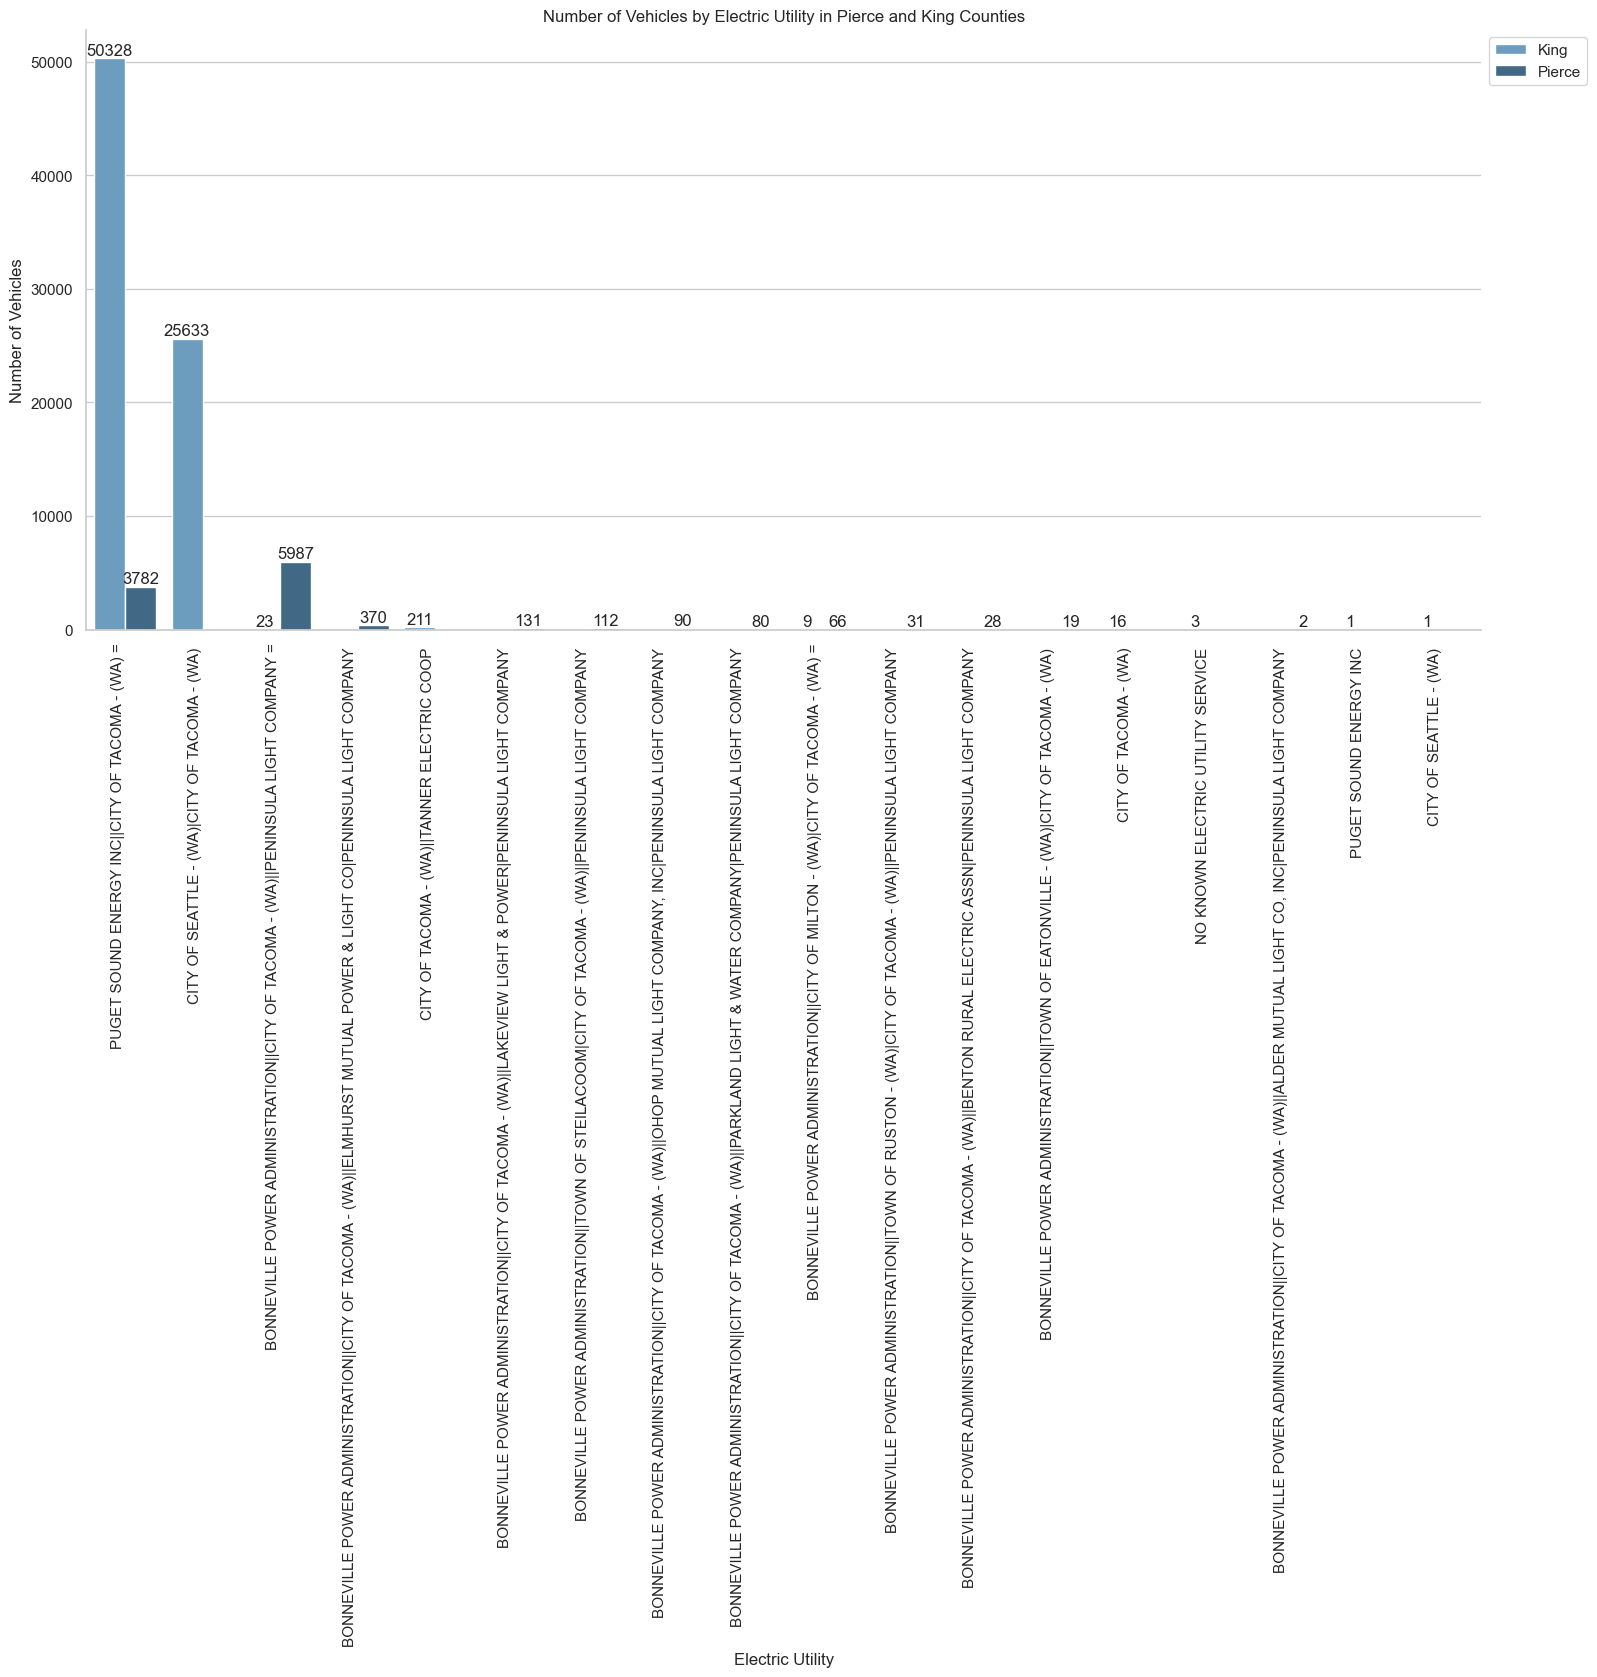

In [23]:
# סינון הנתונים לרכבים חשמליים בלבד (BEV) במחוזות פירס וקינג
selected_counties = ['Pierce', 'King']
selected_electric_vehicles = ev_data[
    (ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') &
    (ev_data['County'].isin(selected_counties))
]

# קבץ לפי מחוז וספק חשמל וספור את מספר הרכבים
utility_counts = selected_electric_vehicles.groupby(['County', 'Electric Utility']).size().reset_index(name='Vehicle Count')

# זיהוי הספקים המשותפים בין מחוזות פירס וקינג
pierce_utilities = utility_counts[utility_counts['County'] == 'Pierce']['Electric Utility'].unique()
king_utilities = utility_counts[utility_counts['County'] == 'King']['Electric Utility'].unique()
common_utilities = set(pierce_utilities).intersection(set(king_utilities))

# הוסף עמודה לסימון ספקים משותפים
utility_counts['Common'] = utility_counts['Electric Utility'].apply(lambda x: '=' if x in common_utilities else '')

# צור עמודה חדשה שמציגה את הספק יחד עם סימן השוויון (אם יש)
utility_counts['Utility Label'] = utility_counts.apply(lambda row: f"{row['Electric Utility']} {row['Common']}", axis=1)

# מיין לפי מספר הרכבים
utility_counts = utility_counts.sort_values(by='Vehicle Count', ascending=False)

# הצגת הנתונים בגרף באמצעות Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='Utility Label', y='Vehicle Count', hue='County', data=utility_counts, palette='Blues_d')

ax.set_xlabel('Electric Utility')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles by Electric Utility in Pierce and King Counties')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# הוספת מספרים על הגרף
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# הזזת האגדה לצד ימין
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

# הצגה עם מרווחים מותאמים אישית
plt.subplots_adjust(bottom=0.3, top=0.9)
plt.show()

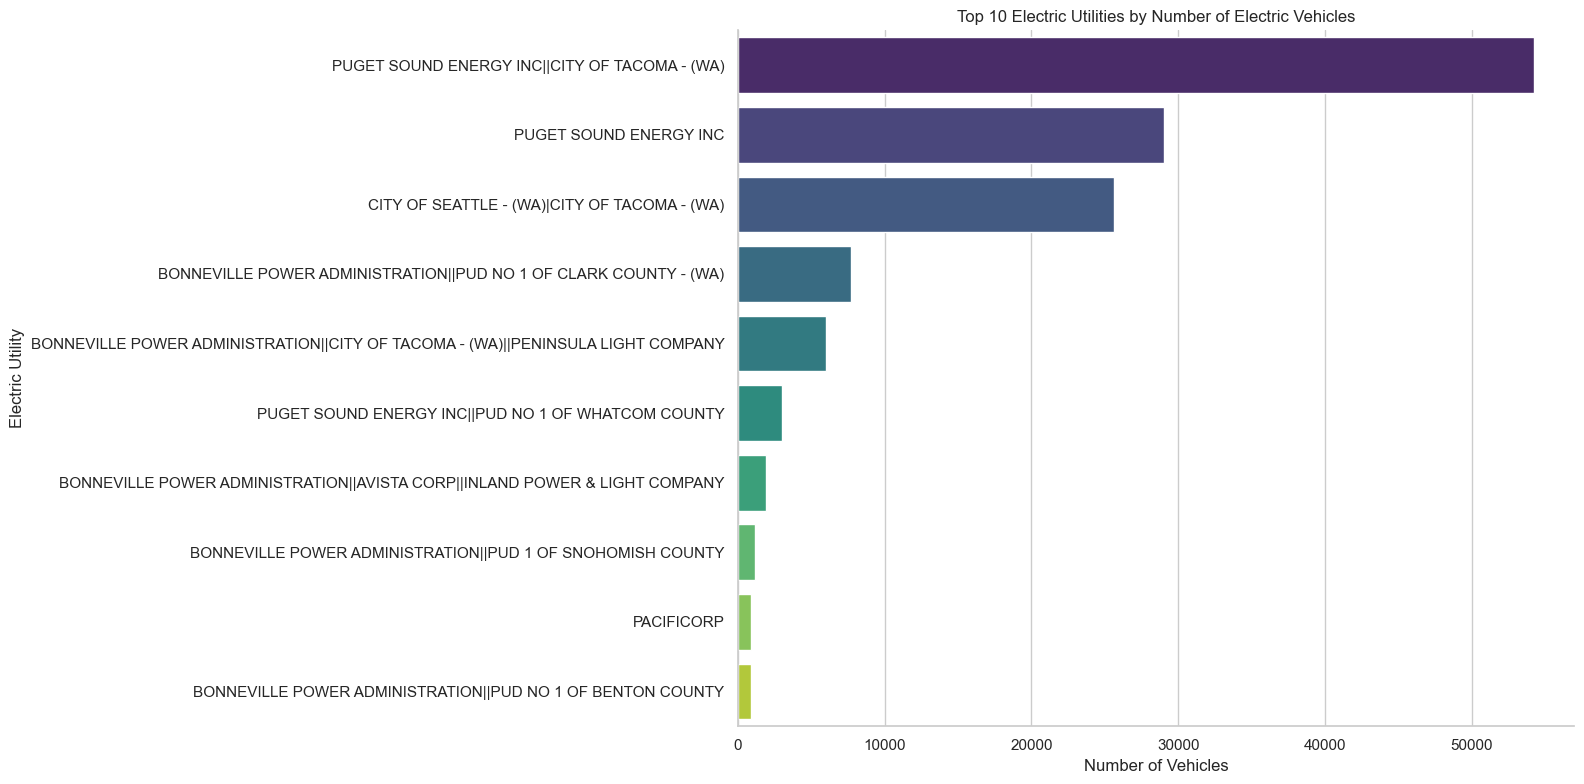

In [24]:
# הנחת שיש לך את dataframe של electric_vehicles
# יצירת רשימה של 10 ספקי החשמל המובילים לפי מספר הרכבים
utility_counts = electric_vehicles['Electric Utility'].value_counts().head(10)

# הכנת הנתונים לגרף
data = pd.DataFrame({'Electric Utility': utility_counts.index, 'Number of Vehicles': utility_counts.values})

# יצירת גרף באמצעות Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))  # הגדלת הגרף לרוחב 16 אינץ' וגובה 8 אינץ'
ax = sns.barplot(x='Number of Vehicles', y='Electric Utility', data=data, palette='viridis')
ax.set_title('Top 10 Electric Utilities by Number of Electric Vehicles')
ax.set_xlabel('Number of Vehicles')
ax.set_ylabel('Electric Utility')

# הצגת הנתונים
sns.despine()
plt.tight_layout()
plt.show()

# סינון הנתונים עבור 10 ספקי החשמל המובילים
top_10_utilities = utility_counts.index
filtered_df = electric_vehicles[electric_vehicles['Electric Utility'].isin(top_10_utilities)]


## מסקנה שנייה: 

### בגרף המוצג ניתן לראות את ספקי החשמל במחוזות קינג ופירס. מצאנו שיש רק שלוש חברות שמשותפות לשני המחוזות. החברה בה יש את מספר הרכבים החשמליים הגבוה ביותר היא חברת פוג'ט. ראינו גם שחברה זו היא החברה המובילה ככלל בשוק.

### מכך, אנחנו מסיקים שחברה עם מספר גבוה של רכבים חשמליים המשתמשים בשירותיה היא ככל הנראה חברה המציעה תמריצים גבוהים ומחירים נוחים. על כן, אנו ממליצים שמחוז פירס יגדיל את השימוש בספק זה ספציפי. במידה ומחוז פירס יעשה זאת, הוא יוכל להגדיל את מספר הרכבים החשמליים במחוזו.


In [33]:
# טען את הקובץ מהכתובת שציינת
url = 'https://raw.githubusercontent.com/morzadik/morzadik/main/ofm_april1_population_final%20%D7%90%D7%97%D7%A8%D7%95%D7%9F%202023.csv'
data = pd.read_csv(url)

## סידור הדאטא: 

In [26]:
# מסיר את השורות שיש בהן ערכים חסרים בעמודת "הערכת אוכלוסייה לשנת 2023"
population_data = data.dropna(subset=['2023 Population Estimate']).copy()

# ממיר את העמודה "הערכת אוכלוסייה לשנת 2023" לערכים נומריים
population_data.loc[:, '2023 Population Estimate'] = pd.to_numeric(population_data['2023 Population Estimate'].str.replace(',', ''), errors='coerce')

In [27]:
population_data

,County,city,2020 Population Census,2021 Population Estimate¹,2022 Population Estimate,2023 Population Estimate
0,Adams,Adams County,"20,613","20,900","21,100",21200.0
1,Adams,Unincorporated Adams County,"9,472","9,575","9,575",9585.0
2,Adams,Incorporated Adams County,"11,141","11,325","11,525",11615.0
3,Adams,Hatton,79,80,80,80.0
4,Adams,Lind,535,535,535,535.0
...,...,...,...,...,...,...
439,Yakima,Toppenish,"8,854","8,870","8,870",8900.0
440,Yakima,Union Gap,"6,568","6,595","6,640",6660.0
441,Yakima,Wapato,"4,607","4,610","4,615",4620.0
442,Yakima,Yakima,"96,968","97,810","98,200",98650.0


הדטא שלנו היית המסודרת ברובה חוץ משתי עמודות ריקות שבהם טיפלנו.

הנתונים בקובץ מכילים הערכות אוכלוסייה עבור מחוזות וערים שונות משנת 2020 עד 2023. אנחנו השתמשנו על פי הנתונים של שנת 2023.


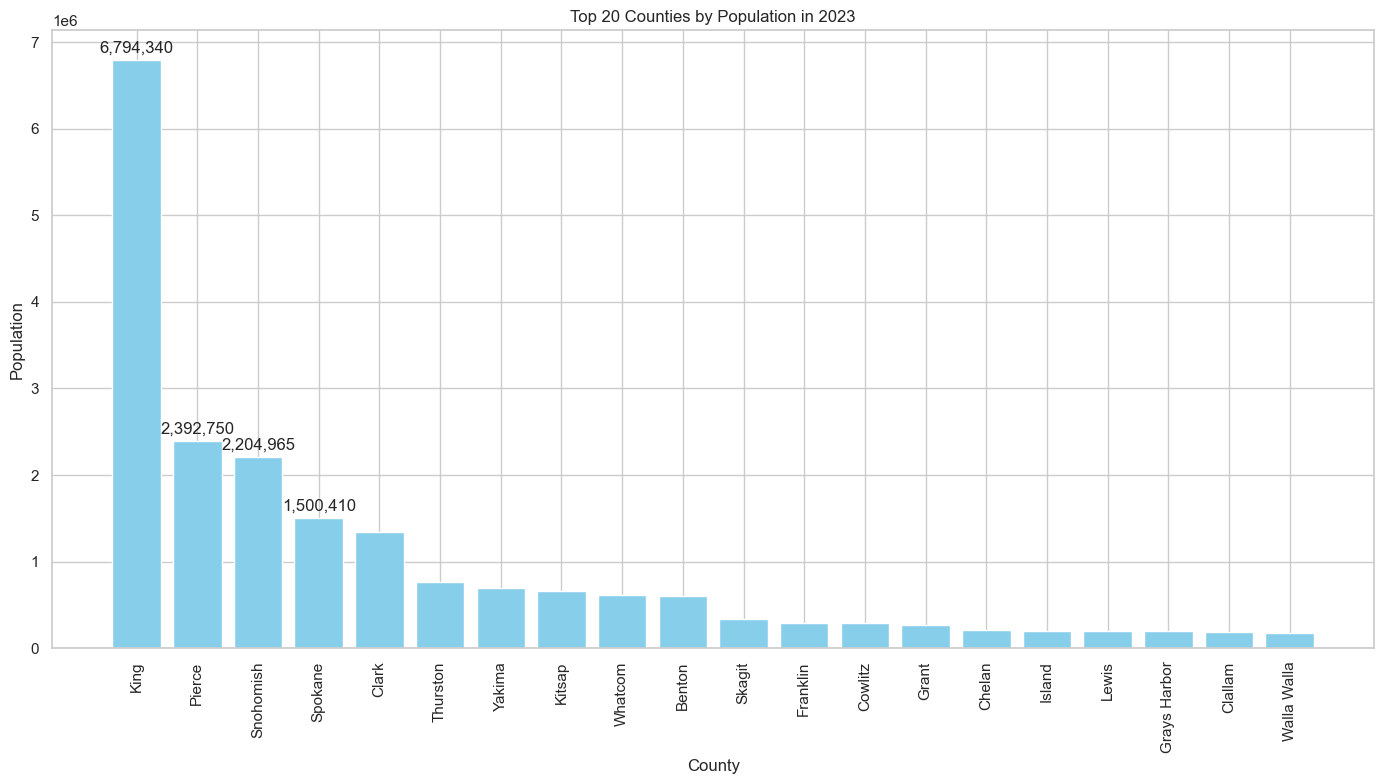

In [28]:
# מקבץ לפי מחוז כדי לקבל את סך האוכלוסייה לכל מחוז לשנת 2023
county_population_2023 = population_data.groupby('County')['2023 Population Estimate'].sum().reset_index()

# ממיין את הנתונים לפי אוכלוסייה בסדר יורד ומחזיר את 20 המחוזות עם האוכלוסייה הגבוהה ביותר
top_20_counties = county_population_2023.sort_values(by='2023 Population Estimate', ascending=False).head(20)

# ציור הגרף עם המחוזות על ציר ה-X
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_counties['County'], top_20_counties['2023 Population Estimate'], color='skyblue')
plt.ylabel('Population')
plt.xlabel('County')
plt.title('Top 20 Counties by Population in 2023')
plt.xticks(rotation=90)  # סובב את שמות המחוזות לקריאות טובה יותר

# הוספת המספרים על 4 העמודות הראשונות עם פסיקים
for bar in bars[:4]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000, f"{int(yval):,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


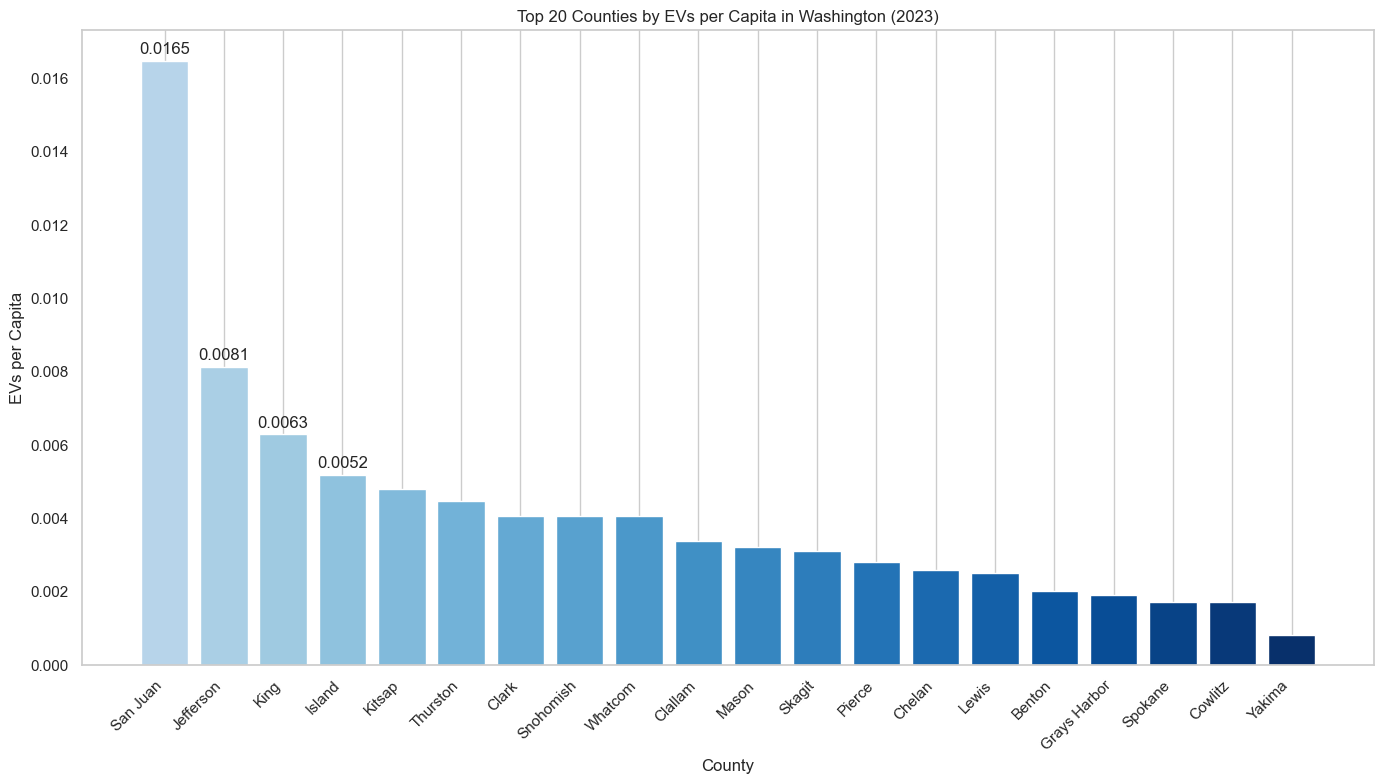

In [29]:
# סינון הנתונים על פי רכבים חשמליים בלבד עם טווח שונה מ-0
bev_data_0 = ev_data[(ev_data['Electric Vehicle Type'].str.contains('Electric')) & (ev_data['Electric Range'] > 0)]

# קיבוץ הנתונים לפי מחוז וספירת מספר האנשים בכל מחוז לשנת 2023
population_by_county_2023 = population_data.groupby('County')['2023 Population Estimate'].sum().reset_index()

# קיבוץ הנתונים לפי מחוז וספירת מספר הרכבים החשמליים בכל מחוז
ev_by_county = bev_data_0.groupby('County').size().reset_index(name='EV Count')

# מיזוג נתוני האוכלוסייה עם נתוני הרכבים החשמליים לפי מחוז
merged_data_ev = pd.merge(population_by_county_2023, ev_by_county, how='left', on='County')

# מציאת 20 המחוזות עם מספר הרכבים החשמליים הגבוה ביותר
top_20_ev_counties = merged_data_ev.nlargest(20, 'EV Count')

# חישוב יחס רכבים חשמליים לנפש
top_20_ev_counties['EVs_per_capita'] = top_20_ev_counties['EV Count'] / top_20_ev_counties['2023 Population Estimate']

# מיון המחוזות לפי יחס רכבים חשמליים לנפש בסדר יורד
top_20_ev_counties = top_20_ev_counties.sort_values(by='EVs_per_capita', ascending=False)

# יצירת גרף עמודות להצגת יחס רכבים חשמליים לנפש ב-20 המחוזות המובילים
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_20_ev_counties['County'], top_20_ev_counties['EVs_per_capita'], color=plt.cm.Blues(np.linspace(0.3, 1, len(top_20_ev_counties))))

# הוספת תוויות מעל כל עמודה, רק ל-4 המחוזות הראשונים
for i, bar in enumerate(bars):
    if i < 4:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom')

ax.set_title('Top 20 Counties by EVs per Capita in Washington (2023)')
ax.set_xlabel('County')
ax.set_ylabel('EVs per Capita')
ax.set_xticks(range(len(top_20_ev_counties)))
ax.set_xticklabels(top_20_ev_counties['County'], rotation=45, ha='right')
ax.grid(axis='y')

plt.tight_layout()
plt.show()

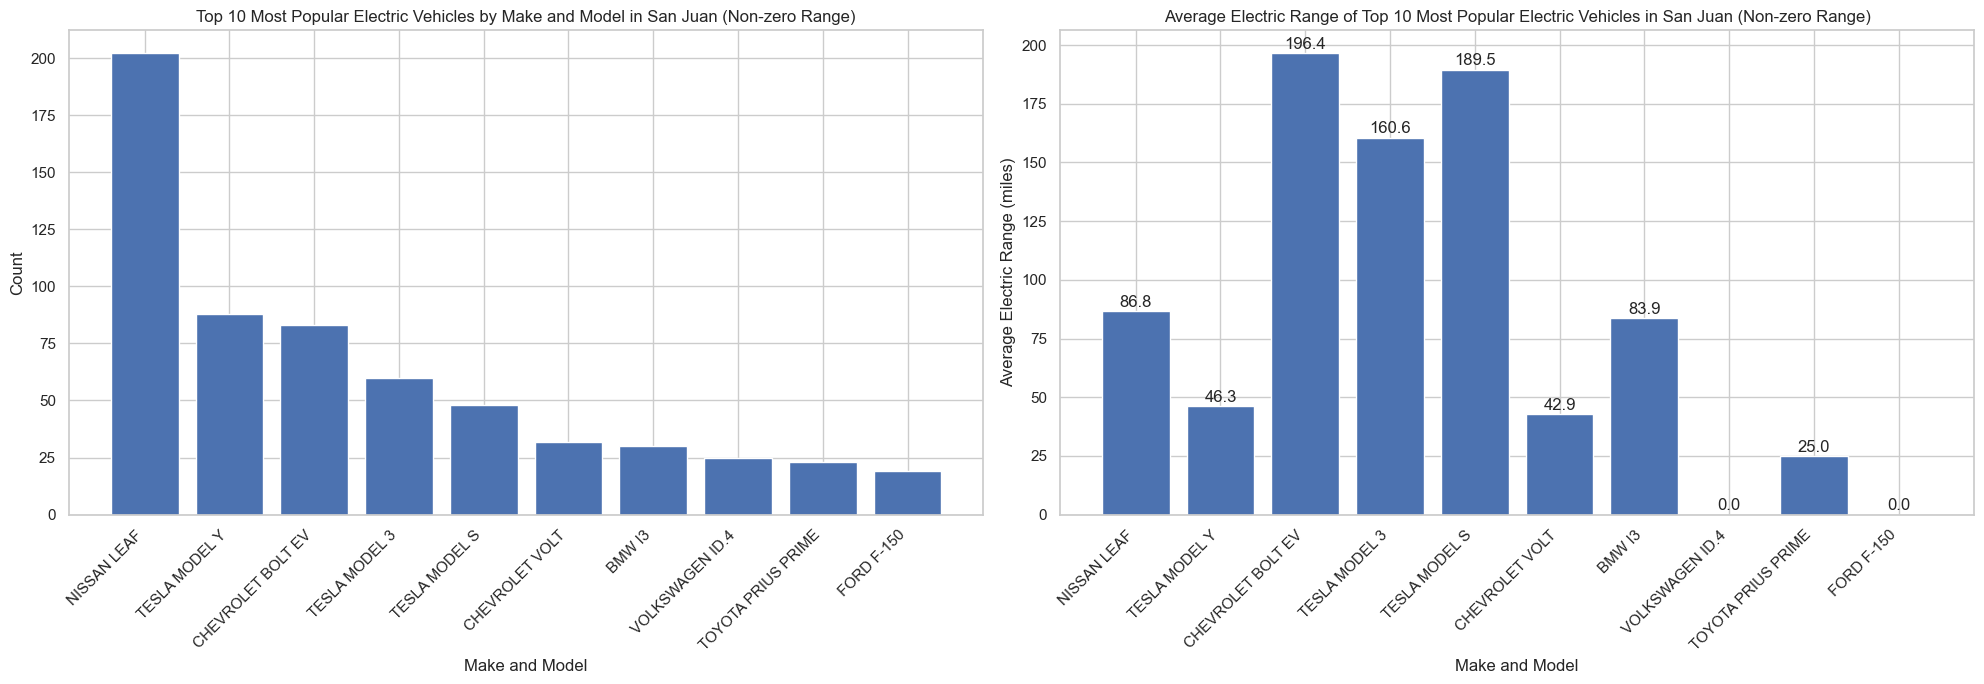

In [30]:
# סינון הנתונים להתייחסות למחוז סן חואן
san_juan_data = ev_data[ev_data['County'] == 'San Juan']

# חישוב טווח חשמלי ממוצע וספירת כמות הרכבים לפי יצרן ודגם
make_model_avg_range =san_juan_data.groupby(['Make', 'Model']).agg({'Electric Range': 'mean', 'VIN (1-10)': 'size'}).reset_index()
make_model_avg_range.columns = ['Make', 'Model', 'Average Electric Range', 'Count']

# מיון הנתונים על פי כמות הרכבים בסדר יורד
make_model_sorted = make_model_avg_range.sort_values(by='Count', ascending=False)

# השגת היצרנים והדגמים הפופולריים ביותר במחוז סן חואן
top_make_model = make_model_sorted.head(10)

# ספירת כמות הרכבים לפי יצרן ודגם
make_model_count_electric = san_juan_data.groupby(['Make', 'Model']).size().reset_index(name='Count')

# מיון הנתונים על פי כמות הרכבים בסדר יורד
make_model_count_sorted_electric = make_model_count_electric.sort_values(by='Count', ascending=False)

# השגת היצרנים והדגמים הפופולריים ביותר במחוז סן חואן
top_make_model_electric = make_model_count_sorted_electric.head(10)

# יצירת גרף המציג את מספר הרכבים הפופולריים ביותר ואת הטווח החשמלי הממוצע
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# גרף 1: מספר הרכבים הפופולריים ביותר
bars1 = ax1.bar(top_make_model_electric['Make'] + ' ' + top_make_model_electric['Model'], top_make_model_electric['Count'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Make and Model')
ax1.set_title('Top 10 Most Popular Electric Vehicles by Make and Model in San Juan (Non-zero Range)')
ax1.set_xticks(range(len(top_make_model_electric)))
ax1.set_xticklabels(top_make_model_electric['Make'] + ' ' + top_make_model_electric['Model'], rotation=45, ha='right')

# גרף 2: טווח חשמלי ממוצע של הרכבים הפופולריים ביותר
bars2 = ax2.bar(top_make_model['Make'] + ' ' + top_make_model['Model'], top_make_model['Average Electric Range'])
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom')
ax2.set_ylabel('Average Electric Range (miles)')
ax2.set_xlabel('Make and Model')
ax2.set_title('Average Electric Range of Top 10 Most Popular Electric Vehicles in San Juan (Non-zero Range)')
ax2.set_xticks(range(len(top_make_model)))
ax2.set_xticklabels(top_make_model['Make'] + ' ' + top_make_model['Model'], rotation=45, ha='right')

# הצגת הגרפים
plt.tight_layout()
plt.show()

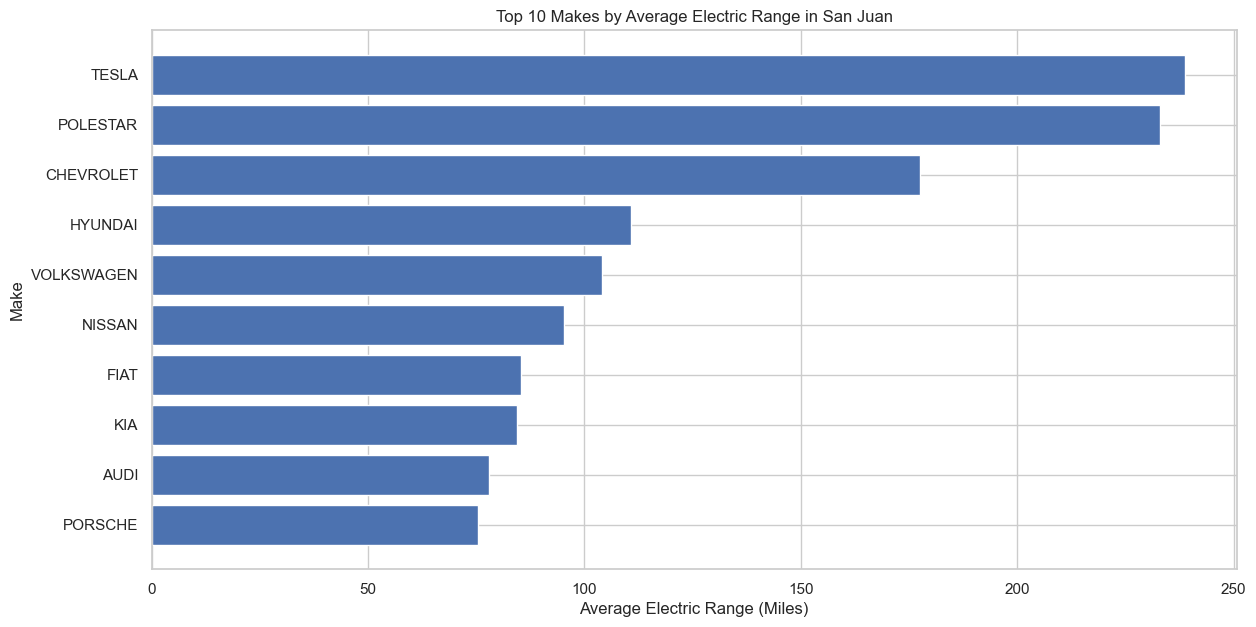

In [31]:
# Filter data for non-zero electric range vehicles in San Juan County
san_juan_nonzero_range = san_juan_data[san_juan_data['Electric Range'] > 0]

# Calculate the average electric range for each Make
make_avg_range = san_juan_nonzero_range.groupby('Make')['Electric Range'].mean().reset_index()
make_avg_range_sorted = make_avg_range.sort_values(by='Electric Range', ascending=False).head(10)

# Plot the top 10 makes with their average electric range
plt.figure(figsize=(14, 7))
plt.barh(make_avg_range_sorted['Make'], make_avg_range_sorted['Electric Range'])
plt.xlabel('Average Electric Range (Miles)')
plt.ylabel('Make')
plt.title('Top 10 Makes by Average Electric Range in San Juan')
plt.gca().invert_yaxis()
plt.show()

In [32]:
san_juan_population = population_data[population_data['County'] == 'San Juan']
san_juan_total_population_2023 = san_juan_population['2023 Population Estimate'].iloc[0]
print("The number of people in San Juan County is:")
san_juan_total_population_2023

The number of people in San Juan County is:


18350.0

<a id='top'></a>
<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-24%20153136%202.jpg?raw=true" width="1000"/>
</div>

## מסקנה שלישית:

### אנחנו מסיקים כי רכבים עם טווח חשמלי גבוה ככל הנראה עולים יותר. 

### ה-ניסאן ליף הוא הרכב הנפוץ ביותר במחוז סאן חואן, עם טווח חשמלי ממוצע של כ-95.3 מיילים. נתון זה הופך אותו לבחירה מוצלחת לתושבים המחפשים רכב בעל מחיר נוח עם טווח חשמלי ממוצע.

### מחוז סאן חואן, בהיותו קטן הן מבחינת גודל האוכלוסייה והן מבחינת השטח, מאפיינים אלה מסבירים את הצורך המופחת שלהם בטווח חשמלי גבוה